In [16]:
mutable struct Contraption
    points::Array{Float64, 2}
    connections::Array{Int, 2}
end

function reshape_connections(connections::Array{Bool, 2})
    
    n = size(connections, 1)
    sparse_c = Array{Int, 2}(undef, 2, 0)
    
    for i in 1:n, j in (i+1):n
        if connections[i, j]
            sparse_c = hcat(sparse_c, [i; j])
        end
    end
    
    return sparse_c
end

function Contraption(points, connections::Array{Bool, 2}) 
    
    # Basic shape checking
    @assert size(points, 1) == 2
    @assert size(points, 2) == size(connections, 1) == size(connections, 2)
    
    return Contraption(points, reshape_connections(connections))
                        
end     

function Contraption(points, connections::Array{Int, 2}) 
    
    # Basic shape checking
    @assert size(points, 1) == 2
    @assert 1 <= minimum(connections)
    @assert maximum(connections) <= size(points, 2)
    
    return Contraption(points, connections)
                             
end

Contraption

In [22]:
function regular_polygon(n, radius = 1., center=[0., 0.])
    function create_point(i)
        θ = 2*π*i/n
        point = [center[1] + radius*cos(θ), 
                 center[2] + radius*sin(θ)]
        return point
    end
    
    points = Array{Float64,2}(undef, 2, n)
    for i in 1:n
        points[1, i], points[2, i] = create_point(i)
    end
    
    return points
end

function complete_connections(n)
   return ones(Bool, n, n) 
end

complete_connections (generic function with 1 method)

In [33]:
n = 200

my_contraption = Contraption(regular_polygon(n), complete_connections(n))

Contraption([0.999507 0.998027 … 0.999507 1.0; 0.0314108 0.0627905 … -0.0314108 -2.44929e-16], [1 1 … 198 199; 2 3 … 200 200])

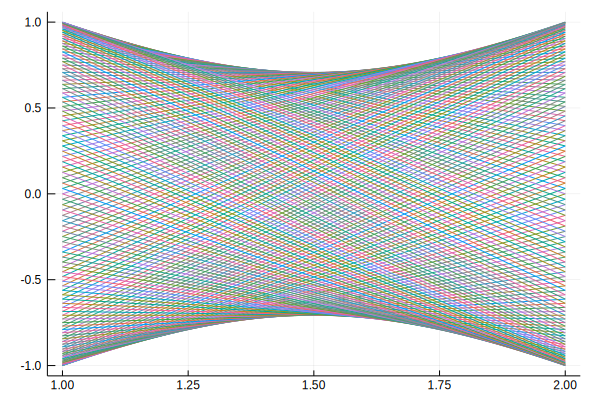

In [34]:
using Plots
plot(my_contraption.points, legend=false)